# 11_2_LEARN-DataAnalysisML

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/11_2_LEARN_DataAnalysisML.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [294]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [295]:
# cloning the data repo
!git clone https://github.com/hiyama341/ConStrain_on_google_colab.git

fatal: destination path 'ConStrain_on_google_colab' already exists and is not an empty directory.


## 1. Setup H2O AutoML

In [296]:
%%capture 
!pip install h2o

In [297]:
import h2o
from h2o.automl import H2OAutoML

In [298]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_351"; Java(TM) SE Runtime Environment (build 1.8.0_351-b10); Java HotSpot(TM) 64-Bit Server VM (build 25.351-b10, mixed mode)
  Starting server from /Users/lucaslevassor/opt/anaconda3/envs/constrain/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp34g_ak0g
  JVM stdout: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp34g_ak0g/h2o_lucaslevassor_started_from_python.out
  JVM stderr: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp34g_ak0g/h2o_lucaslevassor_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,19 secs
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,4 months and 28 days !!!
H2O_cluster_name:,H2O_from_python_lucaslevassor_ubyh33
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [299]:
#h2o.shutdown()

### 1.1 Import our dataframe as h20 object

Train a model based on the target and the df

In [300]:
first_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_all_analytics.csv')
first_input_for_ml 

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_C01,1,2,5,9,0.536658
2,yp49_D01,2,4,7,3,0.175896
3,yp49_E01,2,1,5,7,0.345201
4,yp49_F01,3,3,6,1,26.416324
...,...,...,...,...,...,...
162,yp51_C12,8,3,7,2,0.000000
163,yp51_D12,8,2,7,6,0.614962
164,yp51_E12,8,1,6,10,0.466688
165,yp50_F05,6,1,8,2,15.155009


### 1.2 Investigate how the predictions from the previous ML cycle mathced the sampled strains 

In [301]:
# Run ML with new input 
second_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_2nd_iteration_all_analytics.csv')
second_input_for_ml = second_input_for_ml[['Line_name', '0','1','2','3','norm_strict_%']]
second_input_for_ml.columns = ['Line_name', '0','1','2','3','Amt_norm']

In [302]:
list_of_promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

promoter_dict = {i+1:list_of_promoters[i]for i in range(len(list_of_promoters))}


g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]

pg8h_list_of_index = ['CYC1', 'ENO2']
pcpr_list_of_index = ['CCW12', 'TPI1'] 



g8h_genotype = []
cpr_genotype = []
pg8h_genotype = []
pcpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in second_input_for_ml.iterrows():
    # homologs
    g8h_name = g8h_list_of_index[int(row['0']-1)]
    cpr_name = cpr_list_of_index[int(row['3']-1)]
    
    # promoters
    pg8h_name =promoter_dict[row['1']]
    pcpr_name = promoter_dict[row['2']]
    
    
    # save the genotypes
    g8h_genotype.append(g8h_name)
    cpr_genotype.append(cpr_name)
    pg8h_genotype.append(pg8h_name)
    pcpr_genotype.append(pcpr_name)

second_input_for_ml['G8H'] = g8h_genotype
second_input_for_ml['CPR'] = cpr_genotype
second_input_for_ml['pG8H'] = pg8h_genotype
second_input_for_ml['pCPR'] = pcpr_genotype
second_input_for_ml

,Line_name,0,1,2,3,Amt_norm,G8H,CPR,pG8H,pCPR
0,yp53_A01,4,1,5,2,9.058562,Vmin,Aan,CYC1,CCW12
1,yp53_A02,4,1,5,2,28.175952,Vmin,Aan,CYC1,CCW12
2,yp53_A04,4,2,5,2,80.375862,Vmin,Aan,ENO2,CCW12
3,yp53_A06,5,1,5,2,121.767572,Smus,Aan,CYC1,CCW12
4,yp53_A07,5,2,6,2,159.059724,Smus,Aan,ENO2,TPI1
...,...,...,...,...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,15.322951,Vmin,Cro,CYC1,TPI1
125,yp54_C04,5,2,6,3,94.318358,Smus,Ara,ENO2,TPI1
126,yp54_C09,3,1,6,3,46.469517,Cro,Ara,CYC1,TPI1
127,yp54_D12,5,1,6,6,3.718051,Smus,Ahu,CYC1,TPI1


In [303]:
second_input_for_ml["Names"] = second_input_for_ml[['G8H', 'pG8H','pCPR', 'CPR']].agg('-'.join, axis=1)
second_input_for_ml =second_input_for_ml[['Names', 'Amt_norm', 'Line_name']]
second_input_for_ml

,Names,Amt_norm,Line_name
0,Vmin-CYC1-CCW12-Aan,9.058562,yp53_A01
1,Vmin-CYC1-CCW12-Aan,28.175952,yp53_A02
2,Vmin-ENO2-CCW12-Aan,80.375862,yp53_A04
3,Smus-CYC1-CCW12-Aan,121.767572,yp53_A06
4,Smus-ENO2-TPI1-Aan,159.059724,yp53_A07
...,...,...,...
124,Vmin-CYC1-TPI1-Cro,15.322951,yp54_A04
125,Smus-ENO2-TPI1-Ara,94.318358,yp54_C04
126,Cro-CYC1-TPI1-Ara,46.469517,yp54_C09
127,Smus-CYC1-TPI1-Ahu,3.718051,yp54_D12


In [304]:
first_round_top_producers

,Names,Predicted_strict_production,Predicted_strict_production_rank_pct
0,Smus-ENO2-TPI1-Rse,169.288180,1.000000
1,Rsep-ENO2-TPI1-Ara,162.151856,0.999106
2,Smus-ENO2-CCW12-Ara,161.904255,0.998213
3,Smus-CYC1-TPI1-Ara,157.638727,0.997319
4,Smus-ENO2-TPI1-Aan,156.976470,0.996425
...,...,...,...
1114,Rsep-CYC1-TPI1-Ani,-9.125477,0.004468
1115,Ccal-ENO2-TPI1-Cac,-12.768510,0.003575
1116,Rsep-PCK1-CCW12-Ara,-12.901417,0.002681
1117,Ccal-ENO2-CCW12-Cac,-16.241411,0.001787


In [305]:
first_round_top_producers = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/top20_ML_predicted_after_first_DBTL_1st_analytics.csv')
first_round_top_producers = first_round_top_producers.sort_values(by='Predicted_strict_production', ascending=False)

first_round_top_producers["Names"] = first_round_top_producers[['G8H', 'pG8H','pCPR', 'CPR']].agg('-'.join, axis=1)
first_round_top_producers  = first_round_top_producers[['Names', 'Predicted_strict_production']]
first_round_top_producers['Predicted_strict_production_rank_pct']= first_round_top_producers['Predicted_strict_production'].rank(pct=True)
first_round_top_producers

,Names,Predicted_strict_production,Predicted_strict_production_rank_pct
0,Smus-ENO2-TPI1-Rse,169.288180,1.000000
1,Rsep-ENO2-TPI1-Ara,162.151856,0.999106
2,Smus-ENO2-CCW12-Ara,161.904255,0.998213
3,Smus-CYC1-TPI1-Ara,157.638727,0.997319
4,Smus-ENO2-TPI1-Aan,156.976470,0.996425
...,...,...,...
1114,Rsep-CYC1-TPI1-Ani,-9.125477,0.004468
1115,Ccal-ENO2-TPI1-Cac,-12.768510,0.003575
1116,Rsep-PCK1-CCW12-Ara,-12.901417,0.002681
1117,Ccal-ENO2-CCW12-Cac,-16.241411,0.001787


In [306]:
second_input_for_ml

,Names,Amt_norm,Line_name
0,Vmin-CYC1-CCW12-Aan,9.058562,yp53_A01
1,Vmin-CYC1-CCW12-Aan,28.175952,yp53_A02
2,Vmin-ENO2-CCW12-Aan,80.375862,yp53_A04
3,Smus-CYC1-CCW12-Aan,121.767572,yp53_A06
4,Smus-ENO2-TPI1-Aan,159.059724,yp53_A07
...,...,...,...
124,Vmin-CYC1-TPI1-Cro,15.322951,yp54_A04
125,Smus-ENO2-TPI1-Ara,94.318358,yp54_C04
126,Cro-CYC1-TPI1-Ara,46.469517,yp54_C09
127,Smus-CYC1-TPI1-Ahu,3.718051,yp54_D12


In [307]:
predicted_vs_sampled = pd.merge(first_round_top_producers, second_input_for_ml, on=['Names'])
predicted_vs_sampled['norm_strict_measured_rank'] = predicted_vs_sampled['Amt_norm'].rank(pct=True)
predicted_vs_sampled['Predicted_strict_production_rank_pct'] = predicted_vs_sampled['Predicted_strict_production'].rank(pct=True)


new_input_for_ml['NA_bottom'] = new_input_for_ml['Amt_norm'].rank(na_option='bottom')
new_input_for_ml['pct_rank'] = new_input_for_ml['Amt_norm'].rank(pct=True)
predicted_vs_sampled = predicted_vs_sampled.sort_values(by= 'Amt_norm', ascending = False)
predicted_vs_sampled['color'] = "black" 

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_15824/644248326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_input_for_ml['NA_bottom'] = new_input_for_ml['Amt_norm'].rank(na_option='bottom')
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_15824/644248326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_input_for_ml['pct_rank'] = new_input_for_ml['Amt_norm'].rank(pct=True)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


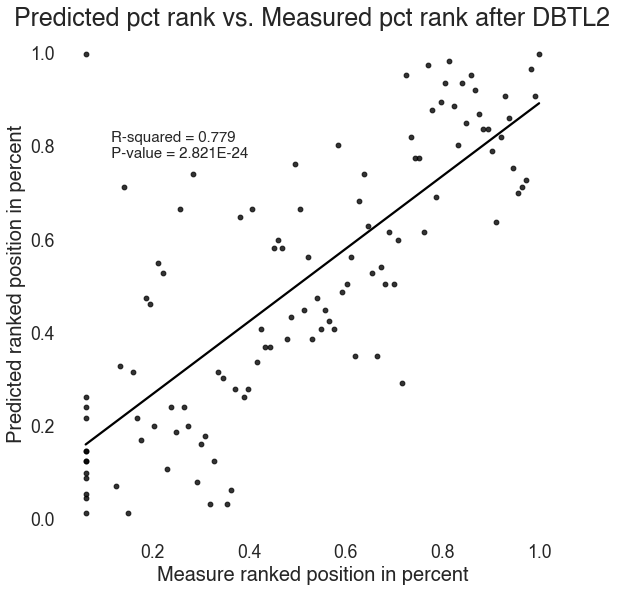

In [343]:
import seaborn as sns
from scipy.stats import pearsonr
import scipy as sp
from scipy import stats

#set seaborn plotting aesthetics as default
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 1.5})

g = sns.lmplot(data=predicted_vs_sampled, x="norm_strict_measured_rank", y="Predicted_strict_production_rank_pct",hue= 'color' , palette=['#000000'], fit_reg = True, height=10, line_kws={'color': 'black'}, ci=False, legend=False)
r, p = stats.pearsonr(predicted_vs_sampled['norm_strict_measured_rank'], predicted_vs_sampled['Predicted_strict_production_rank_pct'])


ax = plt.gca()
# Add labels and titel
ax.set_title(f"Predicted pct rank vs. Measured pct rank after DBTL2", size = 25, fontname='Helvetica')
ax.set_ylabel('Predicted ranked position in percent', size = 20, fontname='Helvetica')
ax.set_xlabel('Measure ranked position in percent', size = 20, fontname='Helvetica')
ax.set_facecolor("white")
plt.suptitle(f"R-squared = {r:.3f} \n  P-value = {p:.3E}", y=0.8 , x= 0.3, size = 15, fontname='Helvetica', fontweight='bold')
# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(8, 8)

name = 'predicted_vs_tested_corr_RANKED_pct_analytics_after_DBTL2'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL2/'+name+'.pdf',format = 'pdf',  dpi = 120)



1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


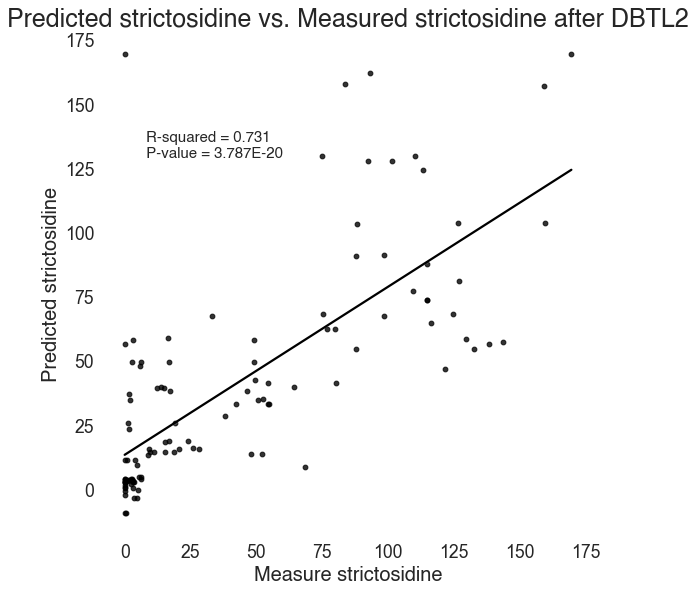

In [309]:
import seaborn as sns
from scipy.stats import pearsonr
import scipy as sp
from scipy import stats

#set seaborn plotting aesthetics as default
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 1.5})

g = sns.lmplot(data=predicted_vs_sampled, x="Amt_norm", y="Predicted_strict_production",hue= 'color' , palette=['#000000'], fit_reg = True, height=10, line_kws={'color': 'black'}, ci=False, legend=False)
r, p = stats.pearsonr(predicted_vs_sampled['Amt_norm'], predicted_vs_sampled['Predicted_strict_production'])

ax = plt.gca()
# Add labels and titel
ax.set_title(f"Predicted strictosidine vs. Measured strictosidine after DBTL2", size = 25, fontname='Helvetica')
ax.set_ylabel('Predicted strictosidine', size = 20, fontname='Helvetica')
ax.set_xlabel('Measure strictosidine', size = 20, fontname='Helvetica')
ax.set_facecolor("white")
plt.suptitle(f"R-squared = {r:.3f} \n  P-value = {p:.3E}", y=0.8 , x= 0.3, size = 15, fontname='Helvetica', fontweight='bold')
# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(8, 8)

name = 'predicted_vs_measured_corr_analytics_after_DBTL2'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL2/'+name+'.pdf',format = 'pdf',  dpi = 120)


### 1.3 Merging the dataframes for updating the model 

In [310]:
first_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_all_analytics.csv')
second_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_2nd_iteration_all_analytics.csv')
second_input_for_ml.columns = ['Line_name', '0','1','2','3','Amt_norm']

In [311]:
new_input_for_ml = pd.concat([first_input_for_ml,second_input_for_ml ])
new_input_for_ml

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_C01,1,2,5,9,0.536658
2,yp49_D01,2,4,7,3,0.175896
3,yp49_E01,2,1,5,7,0.345201
4,yp49_F01,3,3,6,1,26.416324
...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,15.322951
125,yp54_C04,5,2,6,3,94.318358
126,yp54_C09,3,1,6,3,46.469517
127,yp54_D12,5,1,6,6,3.718051


In [312]:
new_input_for_ml['default_rank'] = new_input_for_ml['Amt_norm'].rank()
new_input_for_ml['max_rank'] = new_input_for_ml['Amt_norm'].rank(method='max')
new_input_for_ml['NA_bottom'] = new_input_for_ml['Amt_norm'].rank(na_option='bottom')
new_input_for_ml['pct_rank'] = new_input_for_ml['Amt_norm'].rank(pct=True)

new_input_for_ml

,Line_name,0,1,2,3,Amt_norm,default_rank,max_rank,NA_bottom,pct_rank
0,yp49_A01,1,2,5,1,0.972701,112.0,112.0,112.0,0.378378
1,yp49_C01,1,2,5,9,0.536658,96.0,96.0,96.0,0.324324
2,yp49_D01,2,4,7,3,0.175896,78.0,78.0,78.0,0.263514
3,yp49_E01,2,1,5,7,0.345201,91.0,91.0,91.0,0.307432
4,yp49_F01,3,3,6,1,26.416324,209.0,209.0,209.0,0.706081
...,...,...,...,...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,15.322951,192.0,192.0,192.0,0.648649
125,yp54_C04,5,2,6,3,94.318358,262.0,262.0,262.0,0.885135
126,yp54_C09,3,1,6,3,46.469517,223.0,223.0,223.0,0.753378
127,yp54_D12,5,1,6,6,3.718051,152.0,152.0,152.0,0.513514


### 1.2 Update dataframe Change 

In [313]:
new_input_for_ml = new_input_for_ml[['Line_name', '0','1','2','3','Amt_norm']]
new_input_for_ml.columns = ['Line_name', '0','1','2','3','Amt_norm']
new_input_for_ml

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_C01,1,2,5,9,0.536658
2,yp49_D01,2,4,7,3,0.175896
3,yp49_E01,2,1,5,7,0.345201
4,yp49_F01,3,3,6,1,26.416324
...,...,...,...,...,...,...
124,yp54_A04,4,1,6,1,15.322951
125,yp54_C04,5,2,6,3,94.318358
126,yp54_C09,3,1,6,3,46.469517
127,yp54_D12,5,1,6,6,3.718051


In [314]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:296
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.773648648648647,2.1452702702702697,6.135135135135138,4.750000000000003,29.09914171700607
maxs,NaN,8.0,4.0,8.0,10.0,277.3078163064027
sigma,NaN,1.946604570553522,1.115003045338059,1.0554051268004114,2.5930153901508803,46.17102137141943
zeros,0,0,0,0,0,72
missing,0,0,0,0,0,0
0,yp49_A01,1.0,2.0,5.0,1.0,0.972700677969159
1,yp49_C01,1.0,2.0,5.0,9.0,0.5366584806139938
2,yp49_D01,2.0,4.0,7.0,3.0,0.1758959746019849


In [315]:
# Since the data is categorical we need to make it from numerical to categorical 
df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()

In [316]:
df_test.describe()

Rows:296
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,enum,enum,enum,enum,real
mins,NaN,,,,,0.0
mean,NaN,,,,,29.09914171700607
maxs,NaN,,,,,277.3078163064027
sigma,NaN,,,,,46.17102137141943
zeros,0,,,,,72
missing,0,0,0,0,0,0
0,yp49_A01,1,2,5,1,0.972700677969159
1,yp49_C01,1,2,5,9,0.5366584806139938
2,yp49_D01,2,4,7,3,0.1758959746019849


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


## 2 RUN automl

Here we are defining the autoML object and after we can train it

In [317]:
# Select the columns we want to train on
feature_cols = ['0', '1', '2', '3']

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
    max_models=None,  # None =  no limit
    nfolds=5,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    exclude_algos = ["StackedEnsemble"],
    sort_metric = "MAE",
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [318]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 )


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 24.2 s, sys: 2.84 s, total: 27 s
Wall time: 1h 2s
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_1_20221207_92620_model_44


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 641 weights/biases, 10.8 KB, 2,962,960 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,15.0,,,,,,,,,
1,,2,20,RectifierDropout,50.0,0.0,0.0,0.130935,0.338514,0.0,-0.099002,0.324094,0.059955,0.151546
2,,3,1,Linear,,0.0,0.0,0.000283,0.000361,0.0,0.37203,0.415339,-0.335613,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 446.46579829843796
RMSE: 21.129737298377325
MAE: 11.04293458667994
RMSLE: NaN
Mean Residual Deviance: 446.46579829843796

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 605.9860160360589
RMSE: 24.61678321869165
MAE: 13.060581256858017
RMSLE: NaN
Mean Residual Deviance: 605.9860160360589

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,13.057035,2.666707,14.106705,14.537496,10.885862,16.069212,9.685902
1,mean_residual_deviance,606.380000,332.425480,489.752660,673.583600,409.767030,1150.696900,308.099900
2,mse,606.380000,332.425480,489.752660,673.583600,409.767030,1150.696900,308.099900
3,r2,0.718656,0.123594,0.745477,0.746586,0.743639,0.511757,0.845822
4,residual_deviance,606.380000,332.425480,489.752660,673.583600,409.767030,1150.696900,308.099900
5,rmse,23.960249,6.352801,22.130356,25.953490,20.242704,33.921925,17.552776
6,rmsle,1.139684,0.257331,NaN,0.957724,NaN,1.321645,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-07 09:46:57,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-07 09:46:57,19 min 59.384 sec,328888 obs/sec,10.0,1,2960.0,43.505459,1892.724986,33.711916,0.109122
2,,2022-12-07 09:47:01,20 min 3.422 sec,732680 obs/sec,10010.0,1001,2962960.0,21.129737,446.465798,11.042935,0.789855



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,3.6,1.000000,1.000000,0.091541
1,3.7,0.995671,0.995671,0.091144
2,0.1,0.944558,0.944558,0.086466
3,1.3,0.808703,0.808703,0.074029
4,2.7,0.779124,0.779124,0.071322
5,0.8,0.686849,0.686849,0.062875
6,1.4,0.620536,0.620536,0.056804
7,3.10,0.520538,0.520538,0.047650
8,2.8,0.501273,0.501273,0.045887
9,0.2,0.489493,0.489493,0.044809



See the whole table with table.as_data_frame()


In [319]:
print('DOOOOOOONE')

DOOOOOOONE


## 3. Processing model


In [320]:
# saving the models
leaderboard = AutoML.leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])


# get rid of models with stacked ensemble - they; the tree-based models, the tree ensemble (GBM or Random Forest) ends up memorizing the training data.
#The model has a poor time generalizing on validation data
for model in model_ids:
    if 'StackedEnsemble' in model:
        model_ids.remove(model)

out_path = 'ConStrain_on_google_colab/Data/processed/ML_second_lib_leaderbords'

for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)


In [321]:
len(model_ids)

217

Now we want to extract the best models that are not StackedEnsemble

In [322]:
df_from_h2o_object = leaderboard.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,mae,rmse,mse,rmsle,mean_residual_deviance
0,DeepLearning_grid_1_AutoML_1_20221207_92620_model_44,13.060581,24.616783,605.986016,NaN,605.986016
1,DeepLearning_grid_1_AutoML_1_20221207_92620_model_54,13.281233,24.821056,616.084800,NaN,616.084800
2,DeepLearning_grid_1_AutoML_1_20221207_92620_model_46,13.451054,25.265577,638.349359,NaN,638.349359
3,DeepLearning_grid_1_AutoML_1_20221207_92620_model_51,13.548172,26.360176,694.858869,NaN,694.858869
4,DeepLearning_grid_1_AutoML_1_20221207_92620_model_41,13.650497,26.625006,708.890951,NaN,708.890951
...,...,...,...,...,...,...
212,GBM_grid_1_AutoML_1_20221207_92620_model_14,30.950778,42.070320,1769.911812,2.074515,1769.911812
213,GBM_grid_1_AutoML_1_20221207_92620_model_48,31.397740,42.246998,1784.808810,2.118385,1784.808810
214,GBM_grid_1_AutoML_1_20221207_92620_model_27,31.404562,42.195358,1780.448241,2.120365,1780.448241
215,GBM_grid_1_AutoML_1_20221207_92620_model_19,31.710821,42.806290,1832.378484,2.140317,1832.378484


In [323]:
index_to_delete = []
for index, row in df_from_h2o_object.iterrows():
    if 'StackedEnsemble' in row['model_id']:
        index_to_delete.append(index)

data_wo_ensemble = df_from_h2o_object.drop(labels=index_to_delete, axis=0)
final_df = h2o.H2OFrame(data_wo_ensemble)
final_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20221207_92620_model_44,13.0606,24.6168,605.986,nan,605.986
DeepLearning_grid_1_AutoML_1_20221207_92620_model_54,13.2812,24.8211,616.085,nan,616.085
DeepLearning_grid_1_AutoML_1_20221207_92620_model_46,13.4511,25.2656,638.349,nan,638.349
DeepLearning_grid_1_AutoML_1_20221207_92620_model_51,13.5482,26.3602,694.859,nan,694.859
DeepLearning_grid_1_AutoML_1_20221207_92620_model_41,13.6505,26.625,708.891,nan,708.891
DeepLearning_grid_1_AutoML_1_20221207_92620_model_37,13.6684,24.862,618.121,nan,618.121
DeepLearning_grid_1_AutoML_1_20221207_92620_model_35,13.6699,25.4535,647.881,nan,647.881
DeepLearning_grid_1_AutoML_1_20221207_92620_model_13,13.7628,26.1919,686.015,nan,686.015
DeepLearning_grid_1_AutoML_1_20221207_92620_model_50,13.9167,25.6321,657.007,nan,657.007
DeepLearning_grid_1_AutoML_1_20221207_92620_model_17,13.9286,25.2248,636.292,nan,636.292


### 3.1 Saving the best model

In [324]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_1_20221207_92620_model_44


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 641 weights/biases, 10.8 KB, 2,962,960 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,15.0,,,,,,,,,
1,,2,20,RectifierDropout,50.0,0.0,0.0,0.130935,0.338514,0.0,-0.099002,0.324094,0.059955,0.151546
2,,3,1,Linear,,0.0,0.0,0.000283,0.000361,0.0,0.37203,0.415339,-0.335613,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 446.46579829843796
RMSE: 21.129737298377325
MAE: 11.04293458667994
RMSLE: NaN
Mean Residual Deviance: 446.46579829843796

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 605.9860160360589
RMSE: 24.61678321869165
MAE: 13.060581256858017
RMSLE: NaN
Mean Residual Deviance: 605.9860160360589

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,13.057035,2.666707,14.106705,14.537496,10.885862,16.069212,9.685902
1,mean_residual_deviance,606.380000,332.425480,489.752660,673.583600,409.767030,1150.696900,308.099900
2,mse,606.380000,332.425480,489.752660,673.583600,409.767030,1150.696900,308.099900
3,r2,0.718656,0.123594,0.745477,0.746586,0.743639,0.511757,0.845822
4,residual_deviance,606.380000,332.425480,489.752660,673.583600,409.767030,1150.696900,308.099900
5,rmse,23.960249,6.352801,22.130356,25.953490,20.242704,33.921925,17.552776
6,rmsle,1.139684,0.257331,NaN,0.957724,NaN,1.321645,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-12-07 09:46:57,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-12-07 09:46:57,19 min 59.384 sec,328888 obs/sec,10.0,1,2960.0,43.505459,1892.724986,33.711916,0.109122
2,,2022-12-07 09:47:01,20 min 3.422 sec,732680 obs/sec,10010.0,1001,2962960.0,21.129737,446.465798,11.042935,0.789855



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,3.6,1.000000,1.000000,0.091541
1,3.7,0.995671,0.995671,0.091144
2,0.1,0.944558,0.944558,0.086466
3,1.3,0.808703,0.808703,0.074029
4,2.7,0.779124,0.779124,0.071322
5,0.8,0.686849,0.686849,0.062875
6,1.4,0.620536,0.620536,0.056804
7,3.10,0.520538,0.520538,0.047650
8,2.8,0.501273,0.501273,0.045887
9,0.2,0.489493,0.489493,0.044809



See the whole table with table.as_data_frame()


In [325]:
model_path = h2o.save_model(model=best_model, path="ConStrain_on_google_colab/Data/processed/ML_models_second_lib", force=True)

### 3.2 Exporting the leaderboard

In [326]:
# saving the leaderboard
import os
h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### 3.3 Importing the leaderboard

In [327]:
models_path = 'ConStrain_on_google_colab/Data/processed/ML_second_lib_leaderbords'

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20221207_92620_model_44,13.0606,24.6168,605.986,nan,605.986
DeepLearning_grid_1_AutoML_1_20221207_92620_model_54,13.2812,24.8211,616.085,nan,616.085
DeepLearning_grid_1_AutoML_1_20221207_92620_model_46,13.4511,25.2656,638.349,nan,638.349
DeepLearning_grid_1_AutoML_1_20221207_92620_model_51,13.5482,26.3602,694.859,nan,694.859
DeepLearning_grid_1_AutoML_1_20221207_92620_model_41,13.6505,26.625,708.891,nan,708.891
DeepLearning_grid_1_AutoML_1_20221207_92620_model_37,13.6684,24.862,618.121,nan,618.121
DeepLearning_grid_1_AutoML_1_20221207_92620_model_35,13.6699,25.4535,647.881,nan,647.881
DeepLearning_grid_1_AutoML_1_20221207_92620_model_13,13.7628,26.1919,686.015,nan,686.015
DeepLearning_grid_1_AutoML_1_20221207_92620_model_50,13.9167,25.6321,657.007,nan,657.007
DeepLearning_grid_1_AutoML_1_20221207_92620_model_17,13.9286,25.2248,636.292,nan,636.292


## 4. Importing the best model

In [328]:
best_model = h2o.load_model("ConStrain_on_google_colab/Data/processed/ML_models_second_lib/"+lb[0,0])
my_local_model = h2o.download_model(best_model, path="ConStrain_on_google_colab/Data/processed/ML_models")
uploaded_model = h2o.upload_model(my_local_model)


### 4.1 Investigate model

In [329]:
best_model.cross_validation_holdout_predictions()

predict
8.91589
5.72681
-0.215086
1.76237
8.81229
29.0152
2.49963
4.33419
7.8568
-0.0265448


Get the cross validation predictions

In [330]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
print(cross_validation_holdout_predictions)
print(len(cross_validation_holdout_predictions))

predict
8.91589
5.72681
-0.215086
1.76237
8.81229
29.0152
2.49963
4.33419
7.8568
-0.0265448



296


In [331]:
cross_validation_holdout_predictions.frame_id


'cv_holdout_prediction_DeepLearning_grid_1_AutoML_1_20221207_92620_model_44'

In [332]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram.tail(50)

,predict
246,77.764752
247,98.593186
248,25.135048
249,73.065870
250,71.328501
251,66.316808
252,87.000051
253,19.723011
254,74.943082
255,23.392367


In [333]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

5


In [334]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [335]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True)
df3 = df3.sort_values(by= 'Amt_norm', ascending= False)
df3 = df3.reset_index()
df3['ranked_pct'] = df3['Amt_norm'].rank(pct= True)
df3['ranked_pct_predicted'] = df3['predict'].rank(pct= True)
df3

,index,Line_name,0,1,2,3,Amt_norm,predict,ranked_pct,ranked_pct_predicted
0,73,yp50_D03,5,2,6,3,277.307816,123.476329,1.000000,0.978041
1,75,yp50_G03,6,2,6,5,176.917201,120.208072,0.996622,0.962838
2,205,yp53_D09,5,2,6,5,169.631396,123.797358,0.993243,0.983108
3,86,yp50_E05,5,1,6,8,163.352037,60.158704,0.989865,0.790541
4,193,yp53_C06,6,2,6,4,159.517718,113.765059,0.986486,0.952703
...,...,...,...,...,...,...,...,...,...,...
291,92,yp50_G06,6,4,6,6,0.000000,1.965643,0.123311,0.148649
292,95,yp50_B07,4,3,8,7,0.000000,-1.192965,0.123311,0.050676
293,99,yp50_G07,6,1,5,7,0.000000,4.294763,0.123311,0.331081
294,101,yp50_B08,4,4,5,7,0.000000,-0.040710,0.123311,0.081081


In [336]:
len(df3)

296

In [344]:
df3['color'] = "black" 

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_15824/4051055021.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['category'] = 'Predicted'
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_15824/4051055021.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['category'] = 'Strictosidine'


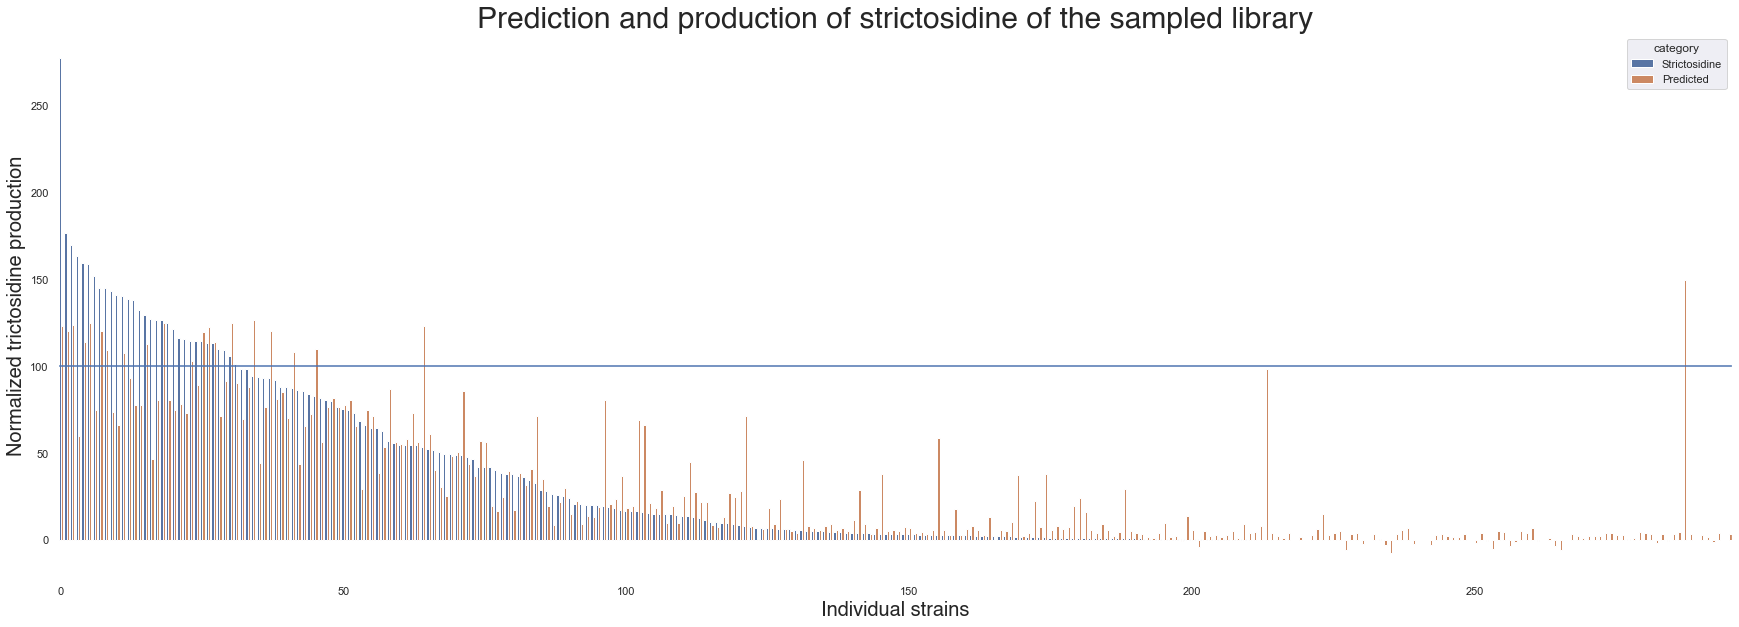

In [366]:
sns.set(rc = {'figure.figsize':(30,10) })

# initialize
ds1 = df3[['Line_name', 'Amt_norm']]
ds1.columns = ['Line_name', 'strict']

ds2 = df3[['Line_name', 'predict']]
ds2.columns = ['Line_name', 'strict']


ds2['category'] = 'Predicted'
ds1['category'] = 'Strictosidine'
dss = pd.concat([ds1, ds2])

ax = sns.barplot(x='Line_name', y='strict', hue='category', data=dss)

ax = plt.gca()
ax.set_xlabel('Individual strains', size = 20, fontname='Helvetica')
ax.set_ylabel('Normalized trictosidine production', size = 20, fontname='Helvetica')
ax.set_title('Prediction and production of strictosidine of the sampled library', size = 30, fontname='Helvetica')

# white background
ax.set_facecolor("white")

plt.xscale('linear') 

# normalized line
ax.axhline(100)


#ax.add_line
name = 'Strictosidine and predicted values for all genotypes samples (dbtl1+2)'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL2/'+name+'.svg',format = 'SVG',  dpi = 120)


None

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


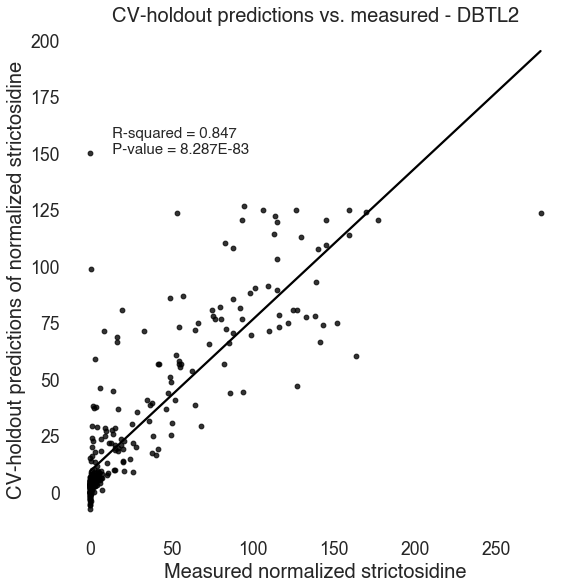

In [367]:
import seaborn as sns
from scipy.stats import pearsonr
import scipy as sp
from scipy import stats

#set seaborn plotting aesthetics as default
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 1.5})

g = sns.lmplot(data=df3, x="Amt_norm", y="predict" ,hue = 'color', palette=['#000000'], fit_reg = True, height=10, line_kws={'color': 'black'}, ci=False, legend=False)
r, p = stats.pearsonr(df3['Amt_norm'], df3['predict'])


ax = plt.gca()
# Add labels and titel
ax.set_title(f"CV-holdout predictions vs. measured - DBTL2", size = 20, fontname='Helvetica')
ax.set_ylabel('CV-holdout predictions of normalized strictosidine', size = 20, fontname='Helvetica')
ax.set_xlabel('Measured normalized strictosidine', size = 20, fontname='Helvetica')
ax.set_facecolor("white")
plt.suptitle(f"R-squared = {r:.3f} \n  P-value = {p:.3E}", y=0.8 , x= 0.3, size = 15, fontname='Helvetica', fontweight='bold')
# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(8, 8)

name = 'ML2_predicted_vs_amtnorm_corr'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL2/'+name+'.pdf',format = 'pdf',  dpi = 300)


None

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


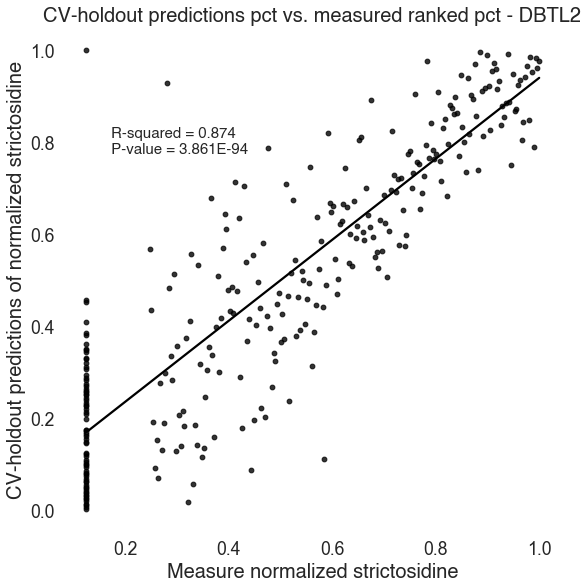

In [368]:
#set seaborn plotting aesthetics as default
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 1.5})

g = sns.lmplot(data=df3, x="ranked_pct", y="ranked_pct_predicted" ,hue = 'color', palette=['#000000'], fit_reg = True, height=10, line_kws={'color': 'black'}, ci=False, legend=False)
r, p = stats.pearsonr(df3['ranked_pct'], df3['ranked_pct_predicted'])


ax = plt.gca()
# Add labels and titel
ax.set_title(f"CV-holdout predictions pct vs. measured ranked pct - DBTL2", size = 20, fontname='Helvetica')
ax.set_ylabel('CV-holdout predictions of normalized strictosidine', size = 20, fontname='Helvetica')
ax.set_xlabel('Measure normalized strictosidine', size = 20, fontname='Helvetica')
ax.set_facecolor("white")
plt.suptitle(f"R-squared = {r:.3f} \n  P-value = {p:.3E}", y=0.8 , x= 0.3, size = 15, fontname='Helvetica', fontweight='bold')
# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(8, 8)

name = 'ML2_predicted_vs_amtnorm_corr_ranked_pct'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL2/'+name+'.pdf',format = 'pdf',  dpi = 300)


None

### 4.2 Learning curve

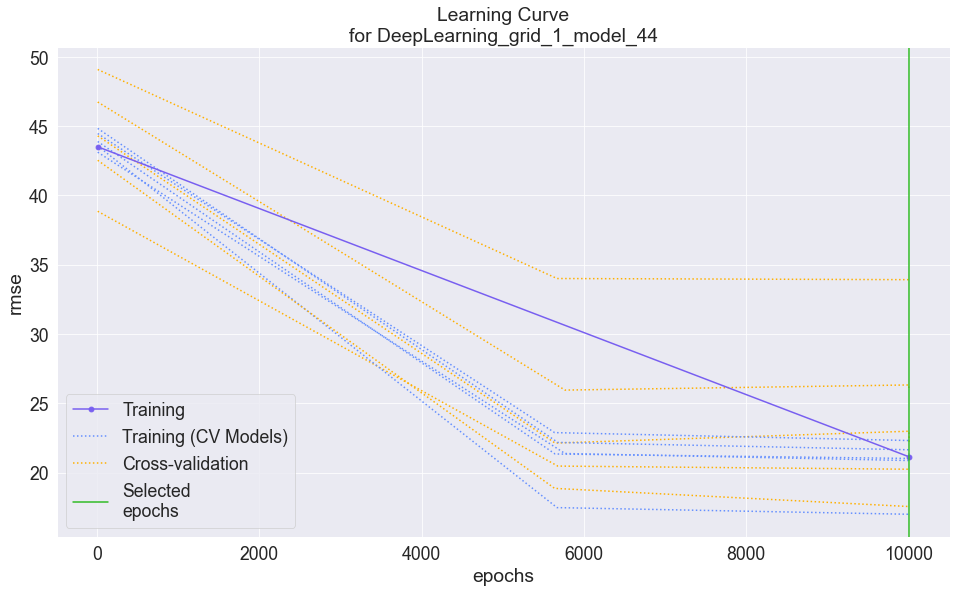

In [369]:

learning_curve = uploaded_model.learning_curve_plot()

name = '1st_analytics_learning_curve'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL2/'+name+'.pdf',format = 'PDF',  dpi = 120)


#plt.title('Number of records by State')
None

In [370]:
as_data_frame_df_test

,Line_name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_C01,1,2,5,9,0.536658
2,yp49_D01,2,4,7,3,0.175896
3,yp49_E01,2,1,5,7,0.345201
4,yp49_F01,3,3,6,1,26.416324
...,...,...,...,...,...,...
291,yp54_A04,4,1,6,1,15.322951
292,yp54_C04,5,2,6,3,94.318358
293,yp54_C09,3,1,6,3,46.469517
294,yp54_D12,5,1,6,6,3.718051


### 4.3 Find predicted genotypes

In [371]:
import numpy as np

In [372]:
all_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/processed/remaining_genotypes_after_first_iteration.csv',)
all_genotypes =all_genotypes[['0','1','2','3']]
all_genotypes

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
2,1,1,5,4
3,1,1,5,5
4,1,1,5,7
...,...,...,...,...
1117,8,4,8,6
1118,8,4,8,7
1119,8,4,8,8
1120,8,4,8,9


In [373]:
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,4
1,1,5,5
1,1,5,7
1,1,5,8
1,1,5,9
1,1,6,1
1,1,6,2
1,1,6,3


In [374]:
#merge_ = pd.merge(new_input_for_ml,all_genotypes, on= ['0','1','2','3'])
#merge_
new_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/processed/input_for_ml_2nd_iteration.csv',  index_col=False)

input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
0,4,1,5,2
1,4,1,5,2
2,4,2,5,2
3,5,1,5,2
4,5,1,5,2
...,...,...,...,...
122,7,2,5,7
123,7,2,5,7
124,7,2,6,7
125,4,2,5,2


### 4.4 Getting rid of the genotypes we have already tested:

In [375]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
#df_diff.to_csv('../data/processed/remaining_genotypes_after_first_iteration.csv')
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
2,1,1,5,4
3,1,1,5,5
4,1,1,5,7
...,...,...,...,...
1117,8,4,8,6
1118,8,4,8,7
1119,8,4,8,8
1120,8,4,8,9


In [376]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [377]:
predicted = best_model.predict(all_genotypes_df)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [378]:
len(predicted)

1049

In [379]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,7.864399
1,5.538732
2,4.739605
3,6.433653
4,-3.300861


In [380]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_15824/105107836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
614,5,2,6,8,136.449362
748,6,2,6,2,131.630369
605,5,2,5,8,129.831792
610,5,2,6,4,129.779319
602,5,2,5,4,125.505125
...,...,...,...,...,...
118,1,4,6,7,-7.184362
23,1,1,7,7,-8.068413
127,1,4,7,6,-8.456192
138,1,4,8,7,-8.634868


If we want the names on the genotypes we can do the following: 

In [381]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

## 5. Top 20 predicted producers

In [382]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_strict_production']
df_with_genotypes.head(20)

,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Cac,136.449362
1,Rsep,ENO2,TPI1,Aan,131.630369
2,Smus,ENO2,CCW12,Cac,129.831792
3,Smus,ENO2,TPI1,Clo,129.779319
4,Smus,ENO2,CCW12,Clo,125.505125
5,Smus,ENO2,CCW12,Aan,123.253665
6,Smus,ENO2,CCW12,Ara,119.308059
7,Rsep,ENO2,TPI1,Cac,119.26859
8,Smus,ENO2,TPI1,Oeu,115.211696
9,Rsep,ENO2,CCW12,Rse,114.732892


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


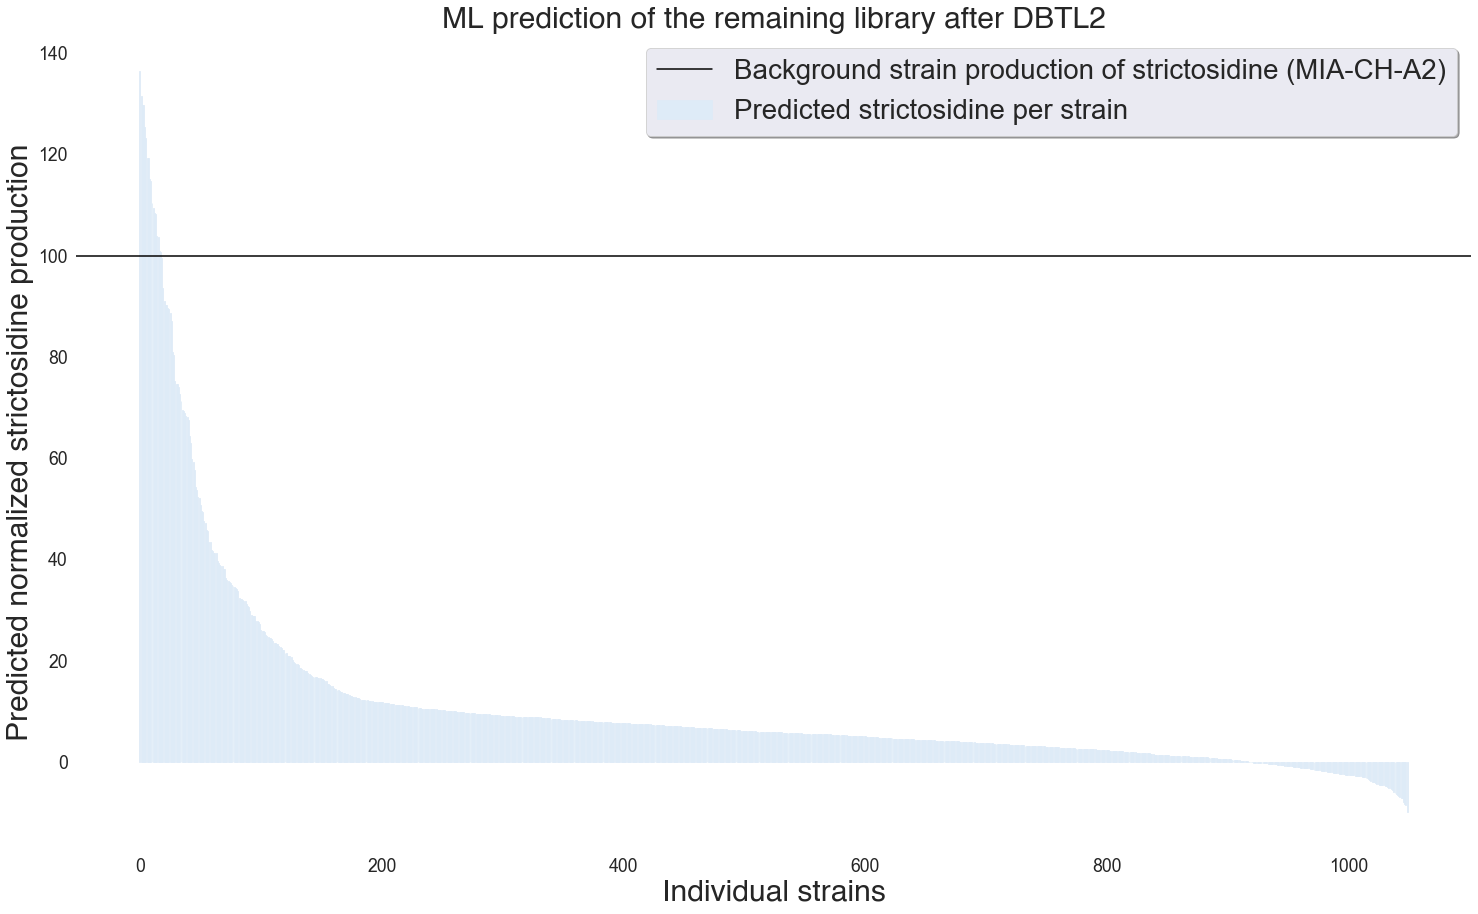

In [383]:
import matplotlib as mpl
from matplotlib.pyplot import figure

#### How can I export a matplotlib figure as a vector graphic with editable text fields?
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt

# Create Figure and Axes instances
fig,ax = plt.subplots(1)

# Plot
plt.bar(df_with_genotypes.index, df_with_genotypes['Predicted_strict_production'], edgecolor='#deebf7', color = '#deebf7' ) # white
  
# Errorbar
#plt.errorbar(indexes, new_df_mean_list, yerr=new_df_SE_list, fmt="o", color="black",)# ms = 2)


# Change x labels rotation
#ax.tick_params(rotation=90)

# Add labels and titel
ax.set_ylabel('Predicted normalized strictosidine production', size = 30, fontname='Helvetica')
ax.set_xlabel('Individual strains', size = 30, fontname='Helvetica')
ax.set_title('ML prediction of the remaining library after DBTL2', size = 30, fontname='Helvetica')
#plt.suptitle('Notes:\n - Triangels show individual measurements',x = 0.8,  y=0.7, fontsize=18, fontname='Helvetica')

# add horisontal line
plt.axhline(y = 100, color = 'black', linestyle = '-')

# Set color 
ax.set_facecolor("white")

# # Add legend
ax.legend(['Background strain production of strictosidine (MIA-CH-A2)', 'Predicted strictosidine per strain'], loc='upper right', shadow=True, fontsize='x-large')


# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(25, 15)
             
name = 'Predicted normalized strictosidine production of reamining library after DBTL2'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL2/'+name+'.pdf',format = 'pdf',  dpi = 300,bbox_inches='tight')

plt.show()

In [384]:
df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/AutoML/top20_ML_predicted_after_second_DBTL_2nd_analytics.csv', index=False)

In [385]:
df_with_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/top20_ML_predicted_after_second_DBTL_2nd_analytics.csv')

In [386]:
df_with_genotypes['names'] = df_with_genotypes['G8H']+'-' +df_with_genotypes['pG8H']+ '_'+ df_with_genotypes['pCPR']+'_'+df_with_genotypes['CPR']

In [387]:
df_with_genotypes

,G8H,pG8H,pCPR,CPR,Predicted_strict_production,names
0,Smus,ENO2,TPI1,Cac,136.449362,Smus-ENO2_TPI1_Cac
1,Rsep,ENO2,TPI1,Aan,131.630369,Rsep-ENO2_TPI1_Aan
2,Smus,ENO2,CCW12,Cac,129.831792,Smus-ENO2_CCW12_Cac
3,Smus,ENO2,TPI1,Clo,129.779319,Smus-ENO2_TPI1_Clo
4,Smus,ENO2,CCW12,Clo,125.505125,Smus-ENO2_CCW12_Clo
...,...,...,...,...,...,...
1044,Cacu,RPL15B,TPI1,Ani,-7.184362,Cacu-RPL15B_TPI1_Ani
1045,Cacu,CYC1,MLS1,Ani,-8.068413,Cacu-CYC1_MLS1_Ani
1046,Cacu,RPL15B,MLS1,Ahu,-8.456192,Cacu-RPL15B_MLS1_Ahu
1047,Cacu,RPL15B,URE2,Ani,-8.634868,Cacu-RPL15B_URE2_Ani


In [388]:
x_axis = list(df_with_genotypes['names'])[:20][::-1]
y_axis = list(df_with_genotypes['Predicted_strict_production'])[:20][::-1]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


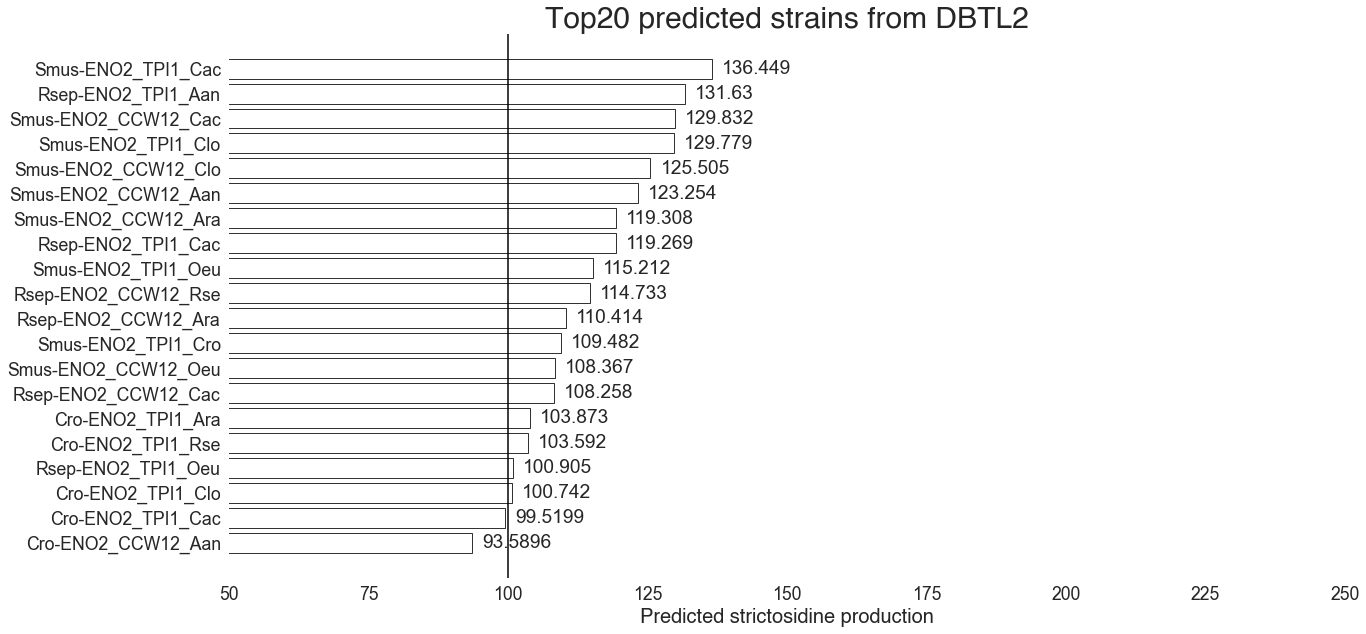

In [389]:
import matplotlib as mpl
from matplotlib.pyplot import figure

#### How can I export a matplotlib figure as a vector graphic with editable text fields?
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42



import matplotlib.pyplot as plt

# Create Figure and Axes instances
fig,ax = plt.subplots(1)

# Plot
plt.barh( x_axis[:20],y_axis[:20], edgecolor='black', color =  'white') # white # '#deebf7'

# Change x labels rotation
ax.tick_params(rotation=90)

# Add labels and titel
ax.set_xlabel('Predicted strictosidine production', size = 20, fontname='Helvetica')
#ax.set_ylabel('Individual strains', size = 20, fontname='Helvetica')
ax.set_title('Top20 predicted strains from DBTL2', size = 30, fontname='Helvetica')
#plt.suptitle('Notes:\n - Triangels show individual measurements',x = 0.8,  y=0.7, fontsize=18, fontname='Helvetica')

# remove gridlines
ax.grid(False)

# Background
ax.set_facecolor("white")


# add horisontal line
plt.axvline(x = 100, color = 'black', label = 'Normalized strict production', linestyle = '-')

# remove y labels
#plt.yticks([])
ax.tick_params(rotation=0)


# changing 
plt.xlim([50, 250])


# 
#plt.yticks(rotation='horisontal')


## adding the labels on the bar
for c in ax.containers:
#    ax.bar_label(c, labels=names_top20, label_type='center', fontname = 'Helvetica')
    ax.bar_label(c, padding = 10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(20, 10)

name = 'Top20 Predicted_strains_from_ML2'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL2/'+name+'.pdf',format = 'pdf',  dpi = 300,bbox_inches='tight')
#
plt.show()

In [390]:
len(new_input_for_ml)

127

In [391]:
step = int(len(new_input_for_ml)/5)

partitions = [i for i in range(0, len(new_input_for_ml), step)]
partitions

[0, 25, 50, 75, 100, 125]

## 8. Learning curve on data

In [392]:
%%time
all_mae = []

# Run the simulation 3 times
for i in range(3):
    # partitioning
    step = int(len(new_input_for_ml)/5)
    partitions = [i for i in range(0, len(new_input_for_ml), step)]

    # INCREASING THE SIZE OF THE DATASET
    partition1 = new_input_for_ml[partitions[0]:partitions[1]]
    partition2 = new_input_for_ml[partitions[0]:partitions[2]]
    partition3 = new_input_for_ml[partitions[0]:partitions[3]]
    partition4 = new_input_for_ml[partitions[0]:partitions[4]]
    partition5 = new_input_for_ml[partitions[0]:]

    partitions_list = [partition1, partition2, partition3, partition4, partition5]

    lenght_of_the_partitions = []
    for length in partitions_list:
        lenght_of_the_partitions.append(len(length))



    ### Making the dataframes into h2o dfs
    list_of_df_test_frames = []

    for df in partitions_list: 
        # initialize a h20 dataframe 
        df_test = h2o.H2OFrame(pd.concat([df], axis='columns'))

        # Since the data is categorical we need to make it from numerical to categorical 
        df_test['0']= df_test['0'].asfactor()
        df_test['1']= df_test['1'].asfactor()
        df_test['2'] = df_test['2'].asfactor()
        df_test['3'] = df_test['3'].asfactor()

        # save the dataframes
        list_of_df_test_frames.append(df_test)


    ##### setting up ML
    # Select the columns we want to train on
    feature_cols = ['0', '1', '2', '3']

    autoML_dataclasses_list = []

    # Initialize 5 - H2O autoML class
    for i in range(len(list_of_df_test_frames)):
        AutoML = H2OAutoML(
            max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
            max_models=None,  # None =  no limit
            #nfolds=5,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
            seed=1,            # Reproducibility
            exclude_algos = ["StackedEnsemble"],
            sort_metric = "MAE",
            #keep_cross_validation_predictions=True 
        )
        autoML_dataclasses_list.append(AutoML)


    ##### Training the models on partitioned data

    for i in range(len(autoML_dataclasses_list)):
        #for j in range(len(new_list_of_list_with_5x_models[i])):
        autoML_dataclasses_list[i].train(
         x=feature_cols,
         y='Amt_norm',
         training_frame=list_of_df_test_frames[i],
             ) 



    ### getting the mae for each model 

    best_models_mae = []
    for model in autoML_dataclasses_list: 
        best_model = model.get_best_model()
        best_models_mae.append(best_model.mae())
    
    # saving ALL maes
    all_mae.append(best_models_mae)

    print(best_models_mae)
    
df = pd.DataFrame(all_mae, columns =[34, 68, 102, 136, 169], dtype = float)
df = df.T
df.to_csv('SECOND_ml_models_running_over_partioned_data.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:30:33.728: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 25.0.

████████████████████████████ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_994cd3e0e0385b3cf494918024ca4a19> was cancelled by the user.

In [393]:
ml_learning_curve_on_partitioned_data = pd.read_csv('SECOND_ml_models_running_over_partioned_data.csv')
ml_learning_curve_on_partitioned_data.columns= ['partition_length', 0, 1, 2]

ml_learning_curve_on_partitioned_data = ml_learning_curve_on_partitioned_data.set_index('partition_length')
ml_learning_curve_on_partitioned_data

FileNotFoundError: [Errno 2] No such file or directory: 'SECOND_ml_models_running_over_partioned_data.csv'

In [ ]:
ml_learning_curve_on_partitioned_data['mean'] = df.mean(axis=1)
ml_learning_curve_on_partitioned_data['sd'] = df.std(axis=1)

ml_learning_curve_on_partitioned_data

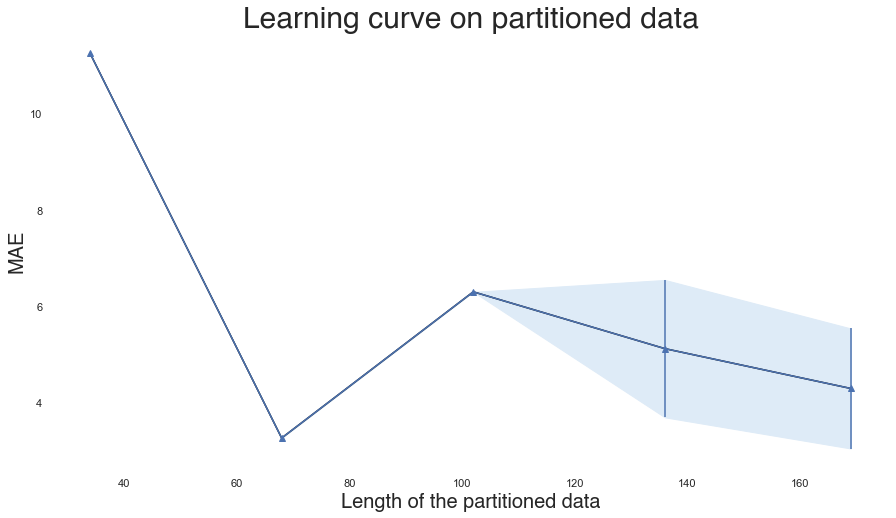

In [236]:
x = list(ml_learning_curve_on_partitioned_data.index)
y = list(ml_learning_curve_on_partitioned_data['mean'])
sd =  np.array(list(ml_learning_curve_on_partitioned_data['sd']))



# Create Figure and Axes instances
fig,ax = plt.subplots(1)

plt.plot(x, y, color =  'black')

# Errobar
plt.errorbar(x, y, sd, linestyle='-', marker='^')

# fill between
plt.fill_between(x, y-sd, y+sd, color = '#deebf7')


# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)



# Add labels and titel
ax.set_xlabel('Length of the partitioned data', size = 20, fontname='Helvetica')
ax.set_ylabel('MAE', size = 20, fontname='Helvetica')
ax.set_title('Learning curve on partitioned data', size = 30, fontname='Helvetica')


# Set color 
ax.set_facecolor("white")

# SIze matters
fig = mpl.pyplot.gcf()
fig.set_size_inches(15, 8)

plt.show()